Association between CRATER DIAMETER and CRATER DEPTH
(0.56458993625446641, 0.0)
linear regresion results
LinregressResult(slope=0.013849030936170134, intercept=-0.01632092964793706, rvalue=0.56458993625446774, pvalue=0.0, stderr=0.00028640531663610475)
R2:  0.31876179612


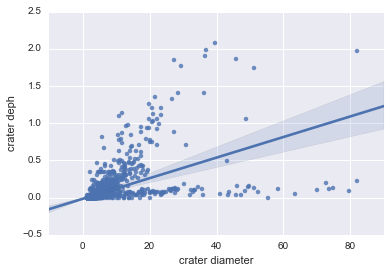

In [2]:
%matplotlib inline
import pandas
import numpy as np
import seaborn
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pandas.read_csv("crateres.csv")



sub1 = data[(data["DIAM_CIRCLE_IMAGE"]>=10) & (data["DIAM_CIRCLE_IMAGE"]<=85)]
sub2 = sub1.copy()

data_clean=data.dropna()

print ("Association between CRATER DIAMETER and CRATER DEPTH")
print (stats.pearsonr(data_clean["DIAM_CIRCLE_IMAGE"], data_clean["DEPTH_RIMFLOOR_TOPOG"]))

r_value = stats.linregress(data_clean["DIAM_CIRCLE_IMAGE"], data_clean["DEPTH_RIMFLOOR_TOPOG"])
print ("linear regresion results")
print (r_value)

X = sm.add_constant(data_clean["DIAM_CIRCLE_IMAGE"])
model= sm.OLS(data_clean["DEPTH_RIMFLOOR_TOPOG"], X)
results = model.fit()
std_error = np.sqrt(results.mse_resid)

print('R2: ', results.rsquared)

scat1 = seaborn.regplot(x="DIAM_CIRCLE_IMAGE", y="DEPTH_RIMFLOOR_TOPOG", fit_reg=True, data=data_clean)
plt.xlabel("crater diameter")
plt.ylabel("crater deph")
plt.show()